# 1. Sales Performance Analysis

Problem Statement : Analyze the overall sales performance by calculating the total revenue, average profit margin, and the number of units sold. Identify the top-selling products and categories. Tasks :

Calculate total revenue for each product and overall.

Calculate the average profit margin for each product.

Identify the top-selling products and categories.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/HP/sales_data.csv")

In [3]:
df.head()

,Unnamed: 0,ProductID,QuantitySold,Price,Discount,Category,Supplier,Date,CustomerID,Country,Profit
0,0,C,8,75.539471,0.064576,Toys,Supplier1,2022-01-01,1148,USA,20.835021
1,1,A,8,43.100482,0.142251,Toys,Supplier3,2022-01-02,1079,USA,11.003640
2,2,C,3,66.907525,0.198508,Clothing,Supplier2,2022-01-03,1885,Canada,6.896583
3,3,C,1,67.017674,0.071013,Home,Supplier3,2022-01-04,1212,USA,8.221993
4,4,A,8,58.219722,0.127749,Toys,Supplier3,2022-01-05,1202,UK,8.201146


In [11]:
df.columns.tolist()

['Unnamed: 0',
 'ProductID',
 'QuantitySold',
 'Price',
 'Discount',
 'Category',
 'Supplier',
 'Date',
 'CustomerID',
 'Country',
 'Profit',
 'Revenue',
 'ProductRevenue',
 'ProfitMargin']

In [4]:
# Calculate total revenue for each product and overall.

df['Revenue'] = df['QuantitySold'] * df['Price']
total_revenue = df['Revenue'].sum()

# Calculate Average Profit Margin
average_profit_margin = ((df['Revenue'] - df['Profit']) / df['Revenue']).mean() * 100

# Calculate Number of Units Sold
total_units_sold = df['QuantitySold'].sum()

# Identify Top-Selling Products
top_selling_products = df.groupby('ProductID')['QuantitySold'].sum().sort_values(ascending=False).head(1)

# Identify Top-Selling Categories
top_selling_categories = df.groupby('Category')['QuantitySold'].sum().sort_values(ascending=False).head(1)

# Displaying Results
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Profit Margin: {average_profit_margin:.2f}%")
print(f"Number of Units Sold: {total_units_sold}")
print("\nTop-Selling Products:")
print(top_selling_products)
print("\nTop-Selling Categories:")
print(top_selling_categories)

Total Revenue: $27715.62
Average Profit Margin: 86.59%
Number of Units Sold: 490

Top-Selling Products:
ProductID
B    172
Name: QuantitySold, dtype: int64

Top-Selling Categories:
Category
Electronics    160
Name: QuantitySold, dtype: int64


In [5]:
df.head()

,Unnamed: 0,ProductID,QuantitySold,Price,Discount,Category,Supplier,Date,CustomerID,Country,Profit,Revenue
0,0,C,8,75.539471,0.064576,Toys,Supplier1,2022-01-01,1148,USA,20.835021,604.315771
1,1,A,8,43.100482,0.142251,Toys,Supplier3,2022-01-02,1079,USA,11.003640,344.803856
2,2,C,3,66.907525,0.198508,Clothing,Supplier2,2022-01-03,1885,Canada,6.896583,200.722574
3,3,C,1,67.017674,0.071013,Home,Supplier3,2022-01-04,1212,USA,8.221993,67.017674
4,4,A,8,58.219722,0.127749,Toys,Supplier3,2022-01-05,1202,UK,8.201146,465.757773


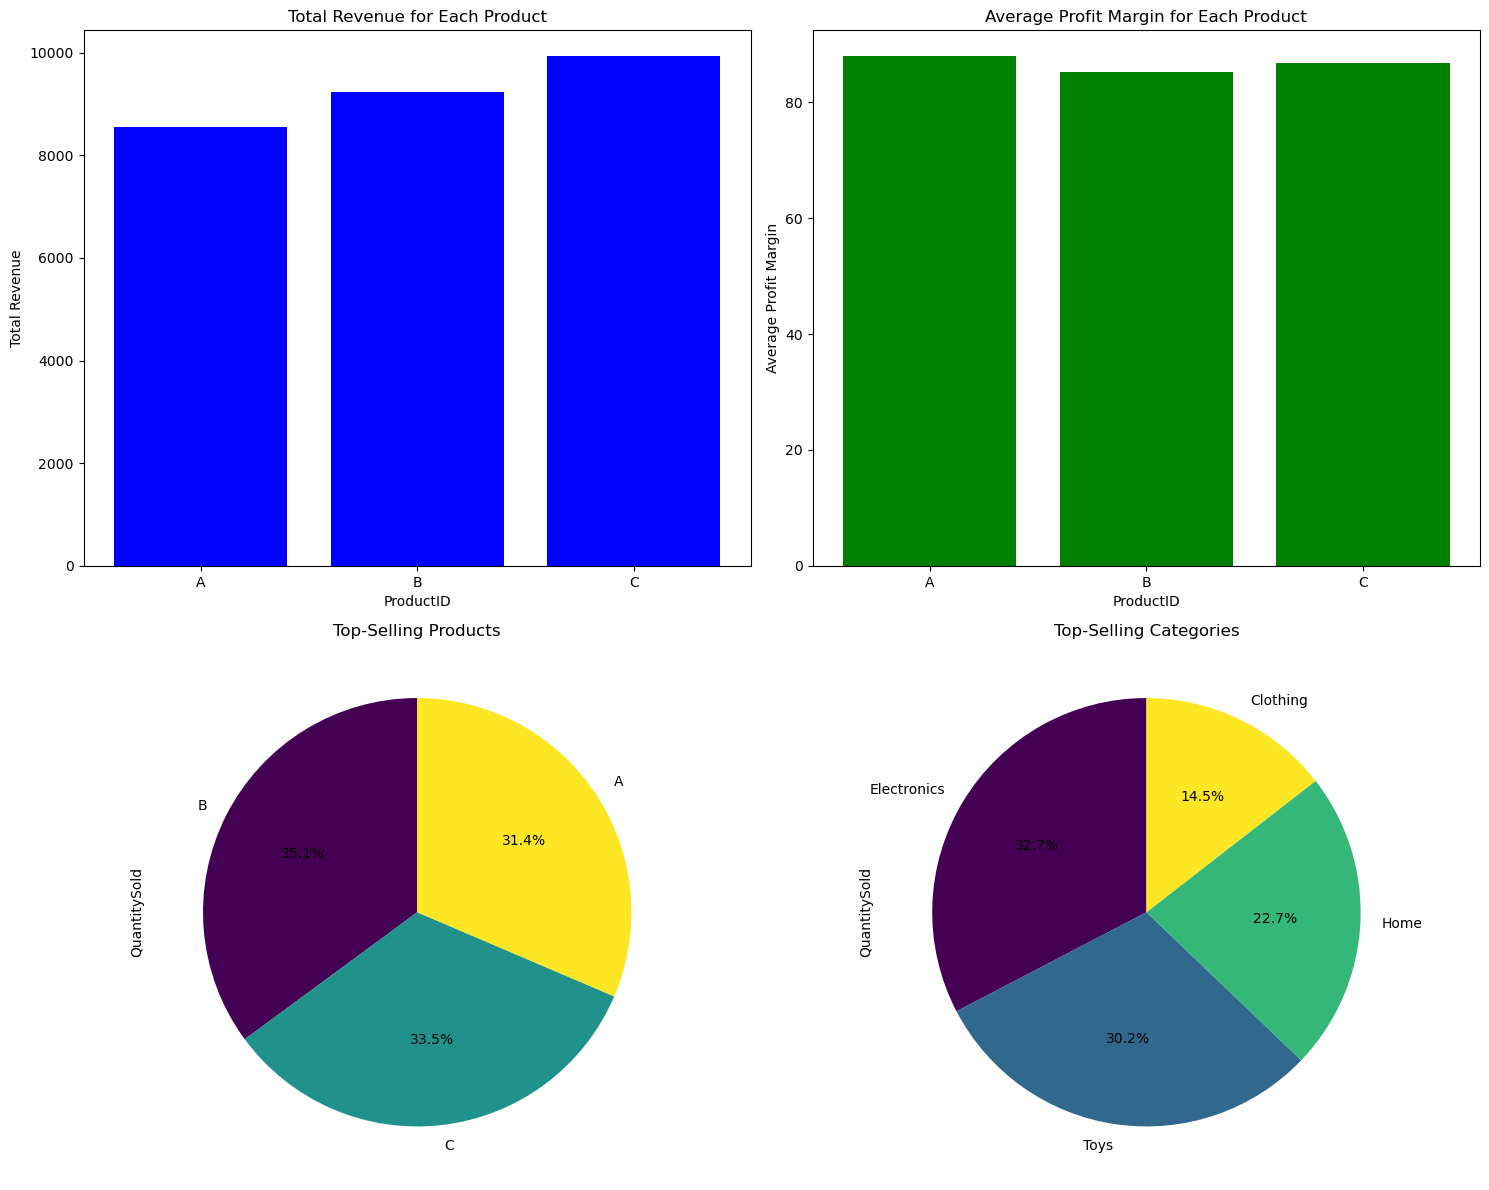

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df['ProductRevenue'] = df['QuantitySold'] * df['Price']
total_revenue_per_product = df.groupby('ProductID')['ProductRevenue'].sum()

#  Calculate Average Profit Margin for Each Product
df['ProfitMargin'] = ((df['Revenue'] - df['Profit']) / df['Revenue']) * 100
average_profit_margin_per_product = df.groupby('ProductID')['ProfitMargin'].mean()

#  Top-Selling Products
top_selling_products = df.groupby('ProductID')['QuantitySold'].sum().sort_values(ascending=False).head(5)

#  Top-Selling Categories
top_selling_categories = df.groupby('Category')['QuantitySold'].sum().sort_values(ascending=False).head(5)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot Total Revenue for Each Product
axs[0, 0].bar(total_revenue_per_product.index, total_revenue_per_product.values, color='blue')
axs[0, 0].set_title('Total Revenue for Each Product')
axs[0, 0].set_xlabel('ProductID')
axs[0, 0].set_ylabel('Total Revenue')

# Plot Average Profit Margin for Each Product
axs[0, 1].bar(average_profit_margin_per_product.index, average_profit_margin_per_product.values, color='green')
axs[0, 1].set_title('Average Profit Margin for Each Product')
axs[0, 1].set_xlabel('ProductID')
axs[0, 1].set_ylabel('Average Profit Margin')

# Plot Top-Selling Products
top_selling_products.plot(kind='pie', ax=axs[1, 0], autopct='%1.1f%%', startangle=90, cmap='viridis')
axs[1, 0].set_title('Top-Selling Products')

# Plot Top-Selling Categories
top_selling_categories.plot(kind='pie', ax=axs[1, 1], autopct='%1.1f%%', startangle=90, cmap='viridis')
axs[1, 1].set_title('Top-Selling Categories')

plt.tight_layout()
plt.show()
